In [1]:
import datetime
print(datetime.datetime.now())

2020-09-06 16:04:56.593331


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# Shopify Data
os. getcwd()

'C:\\Users\\shrut\\Documents\\Shruti admin\\Canada 1\\Jobs'

In [4]:
df = pd.read_csv("Shopify Q1.csv")

In [5]:
#understanding the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


In [6]:
#prints the skewness value for the 'order_amount' variable
print(df['order_amount'].skew())
#prints the summary statistics
df['order_amount'].describe()

16.675033432503792


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

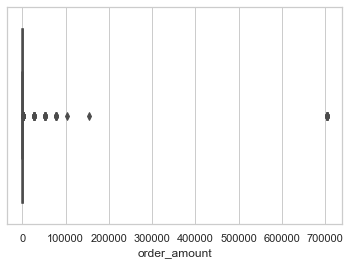

In [7]:
#box plot to show outliers
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(df["order_amount"])

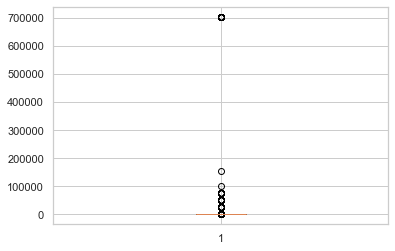

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(df["order_amount"])
plt.show()

In [8]:
# applying groupby() function to group the data on order_amount to find the unique values. 
od = df.groupby('order_amount').size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
# print the entries in all the groups formed. 
od.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [9]:
od.tail(10)

,order_amount,count
9,122,21
8,118,43
7,117,29
6,116,23
5,114,27
4,112,48
3,111,16
2,101,15
1,94,25
0,90,18


In [10]:
#we can try to eliminate these outliers
q1 = df.order_amount.quantile(q=0.25)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1
IQR

227.0

In [11]:
#removes outliers based on the IQR range and store the result in the data frame 'df_clean'
df_clean = df[(df.order_amount < q3 + IQR * 1.5) & (df.order_amount > q3 - IQR * 1.5)]

#shows that for our data, a lot of records get deleted if we use the IQR method
df_clean

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,3/30/2017 13:47
4996,4997,48,789,234,2,cash,3/16/2017 20:36
4997,4998,56,867,351,3,cash,3/19/2017 5:42
4998,4999,60,825,354,2,credit_card,3/16/2017 14:51


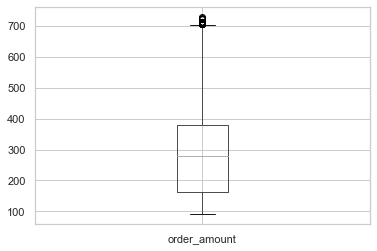

In [12]:
#visualizing using a box plot
df_clean.boxplot(column='order_amount')

In [13]:
df_clean.order_amount.describe().transpose()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64